# Visualization Cassandra

## Imports

In [29]:
from cassandra.cluster import Cluster
from cassandra.query import SimpleStatement
import pytz
import time
from datetime import datetime, date, timezone
import pandas as pd

## Consts

In [30]:
host = '127.0.0.1'
flashback = 5

## Session initialisation

In [31]:
cluster = Cluster([host])
session = cluster.connect()

## Set Keyspace

In [32]:
session.set_keyspace('sensor_data')

## Setup Query

In [33]:
params = (int(time.time() * 1000) - (flashback * 60 * 1000),)

query = SimpleStatement("SELECT * FROM gyroscope_data WHERE tdata >= %s ALLOW FILTERING")

## Query Cassandra

In [34]:
result = session.execute(query, params)

## Prepare data

In [35]:
results = []
for row in result:
    timestamp = datetime.fromtimestamp(row.tdata / 1000.0, tz=timezone.utc)
    timestamp = timestamp.astimezone(pytz.timezone('Europe/Zurich'))
    results.append((timestamp, row.xdata))

print(results)

[(datetime.datetime(2024, 12, 15, 15, 30, 59, 201000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 2.222813844680786), (datetime.datetime(2024, 12, 15, 15, 30, 57, 601000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 6.53866720199585), (datetime.datetime(2024, 12, 15, 15, 30, 59, 601000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), -0.6911755204200745), (datetime.datetime(2024, 12, 15, 15, 30, 59, 321000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), -0.9435287714004517), (datetime.datetime(2024, 12, 15, 15, 30, 58, 111000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 2.5097415447235107), (datetime.datetime(2024, 12, 15, 15, 31, 0, 561000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 20.214202880859375), (datetime.datetime(2024, 12, 15, 15, 31, 0, 251000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), -15.897903442382812), (datetime.datetime(2024, 12, 15, 15, 30, 59, 461000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 5.9742

## Visualise data

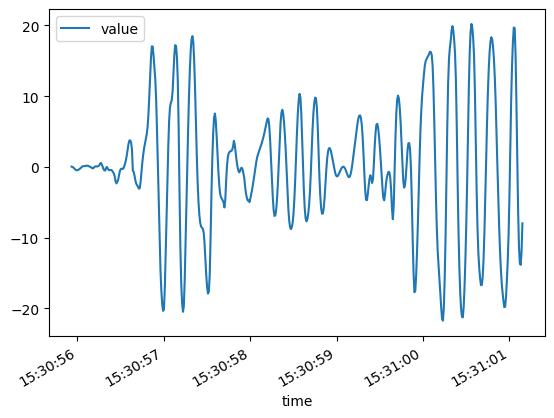

In [36]:
if len(results) > 0:
    res_df = pd.DataFrame(results, columns=['time', 'value', ])
    res_df.plot.line(x='time')
else:
    print(f"No data found in the last {flashback} minutes.")